In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
# cleaned up dataset
df=pd.read_csv('IPPS_Data_Clean.csv',dtype={'provider_id':str,'provider_zip_code':str, 'drg_id':str})
df.head()

,drg_definition,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zip_code,hospital_referral_region_description,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,drg_id
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,039
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,039
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,039
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENTS EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16,039
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44,039


In [4]:
print('Number of procedures:', df.drg_id.nunique())
print(' Number of providers:', df.provider_id.nunique())
print('Number of discharges:', df.total_discharges.sum())

Number of procedures: 100
 Number of providers: 3337
Number of discharges: 6975318


In [5]:
# Number of procedures by state
dfg = df.groupby(['drg_id','provider_state']).size()
dfg = dfg.unstack('provider_state').fillna(0)
dfg.head()

provider_state,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
drg_id,,,,,,,,,,,,,,,,,,,,,
039,1.0,23.0,16.0,24.0,67.0,10.0,15.0,3.0,3.0,81.0,...,4.0,32.0,78.0,6.0,28.0,1.0,21.0,25.0,8.0,2.0
057,1.0,25.0,11.0,18.0,78.0,14.0,16.0,4.0,2.0,102.0,...,3.0,20.0,70.0,2.0,33.0,1.0,10.0,20.0,9.0,1.0
064,2.0,35.0,18.0,26.0,165.0,18.0,22.0,5.0,4.0,113.0,...,5.0,33.0,111.0,7.0,49.0,3.0,35.0,27.0,13.0,1.0
065,6.0,55.0,32.0,38.0,204.0,27.0,26.0,7.0,5.0,138.0,...,7.0,48.0,161.0,8.0,62.0,5.0,39.0,50.0,22.0,4.0
066,4.0,40.0,28.0,30.0,145.0,18.0,25.0,6.0,5.0,121.0,...,6.0,39.0,127.0,8.0,51.0,4.0,38.0,33.0,14.0,2.0


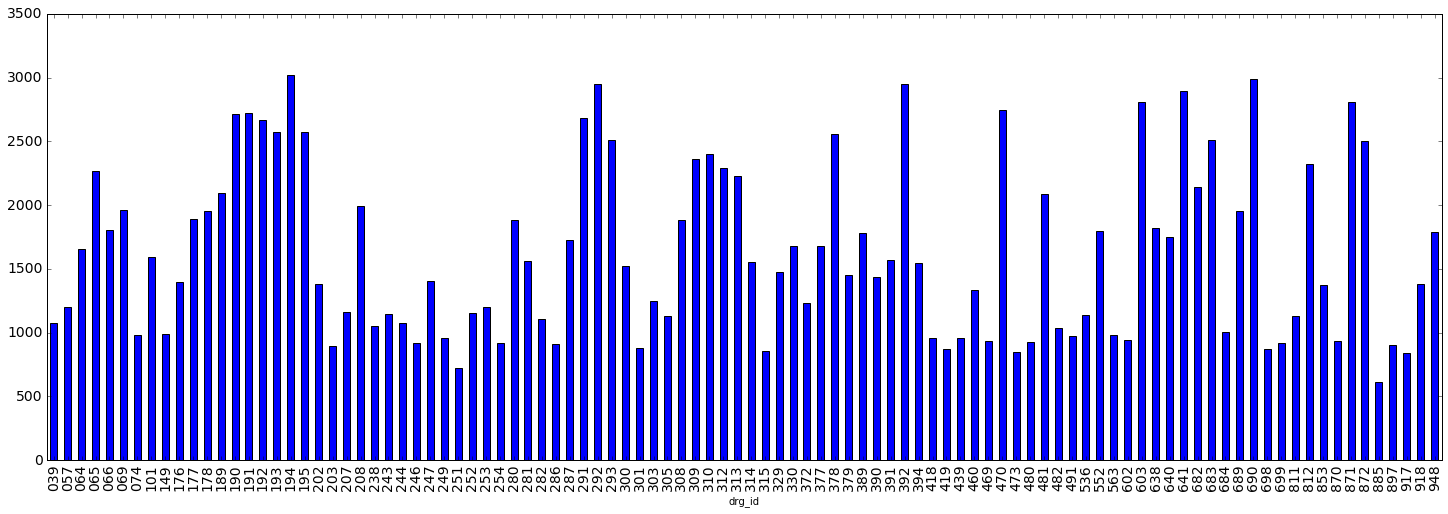

In [6]:
#Total number for each procedure
dfg.sum(1).plot(ylim=0,kind='bar',figsize=(25,8),fontsize=14)

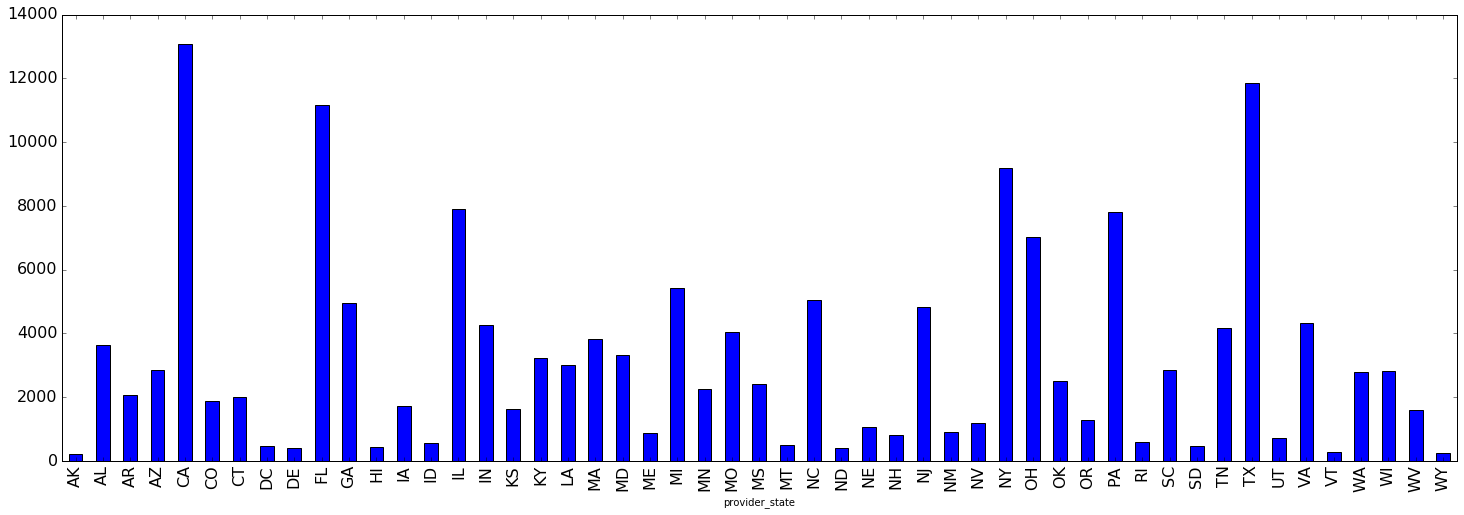

In [7]:
#Total number of procedures in each state
dfg.sum().plot(ylim=0,kind='bar',figsize=(25,8),fontsize=16)

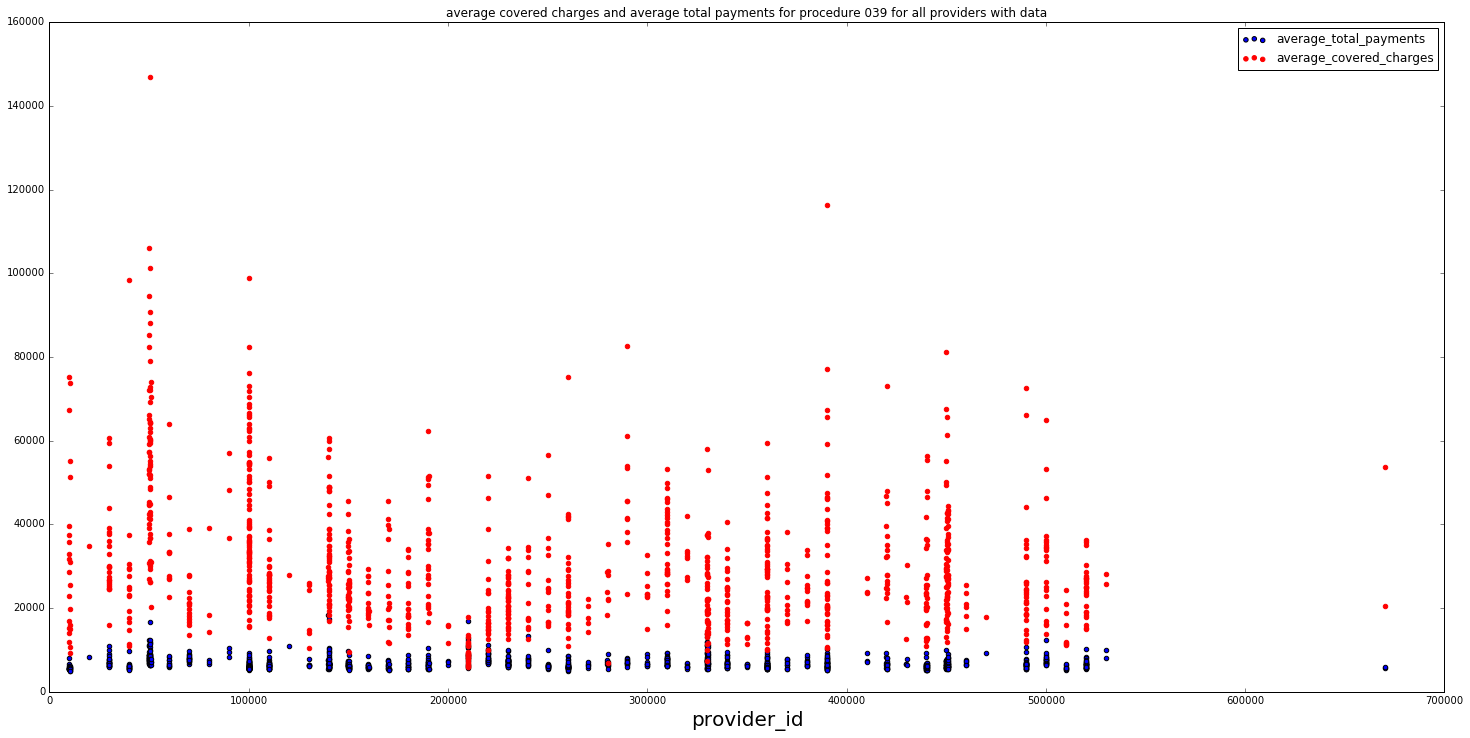

In [8]:
# Plot of average covered charges and average total payments for procedure 039 for all providers.
dfp=df[df.drg_id == '039']
pid=np.array(dfp.provider_id.astype(int))
plt.figure(figsize = (25,12))
plt.scatter(pid,dfp.average_total_payments)
plt.scatter(pid,dfp.average_covered_charges,color='r')
plt.xlim([0,700000])
plt.xlabel('provider_id',fontsize=20)
plt.ylim([0,160000])

plt.title('average covered charges and average total payments for procedure 039 for all providers with data')
plt.legend()


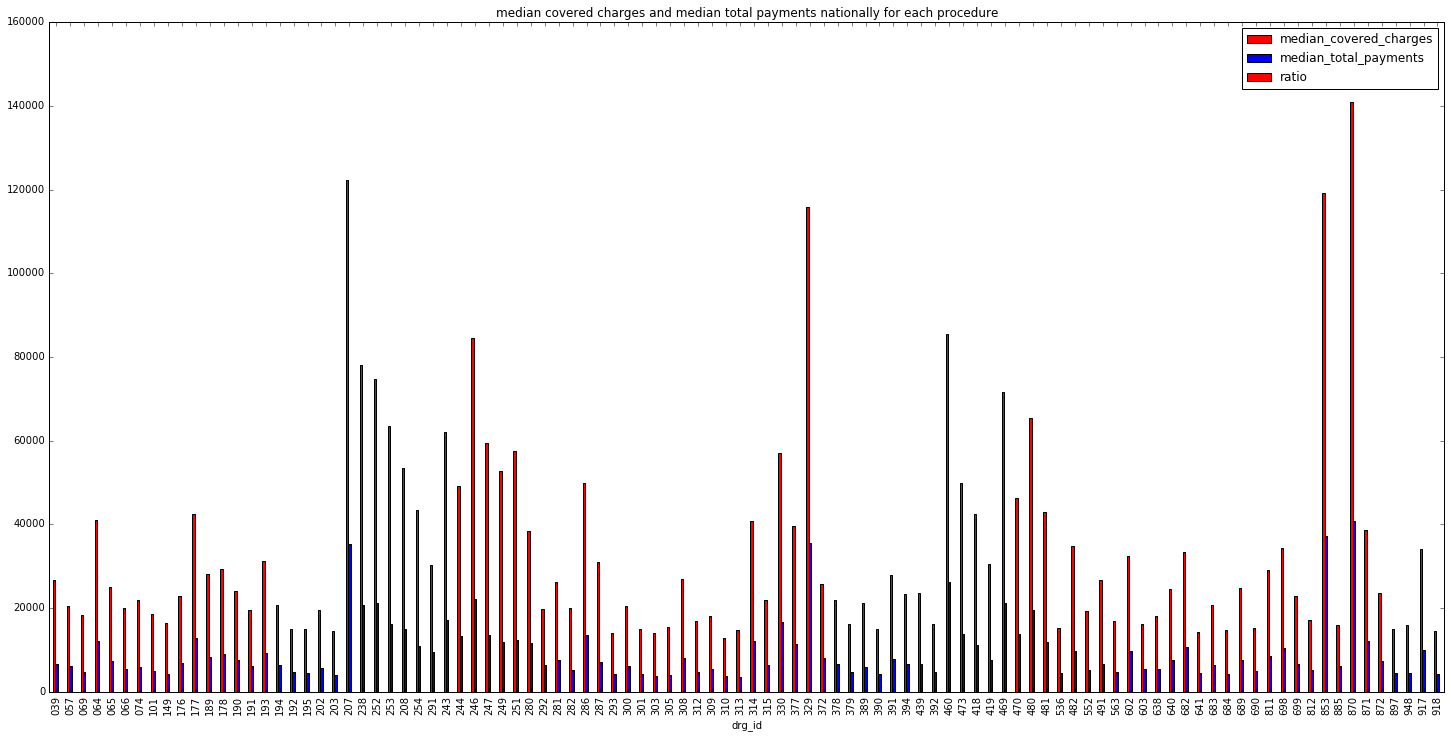

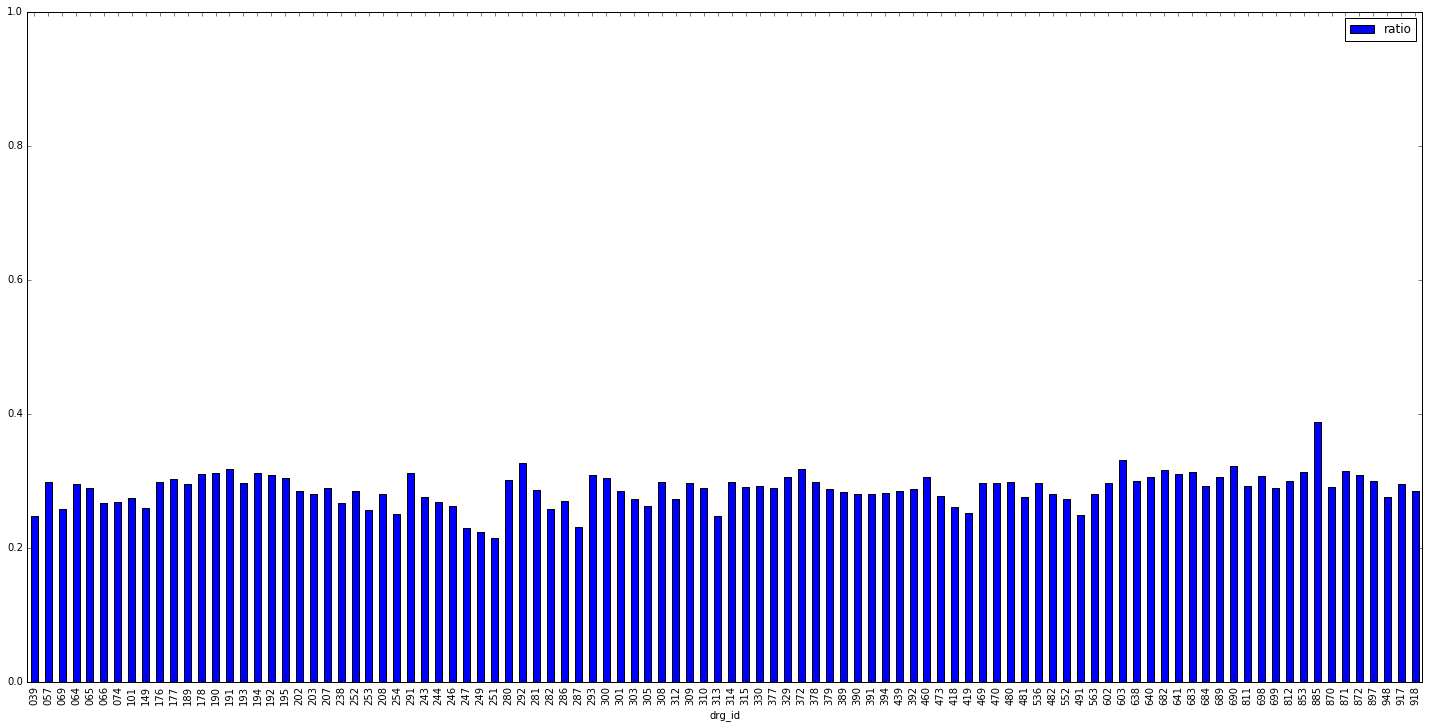

In [31]:
# Plot of median covered charges and median total payments nationally for each procedure.
proc = df.drg_id.unique()
medproc = pd.DataFrame()

for i in proc:
    dfp=df[df.drg_id == i].reset_index(drop=True)
    medpay=dfp.average_total_payments.median()
    medchg=dfp.average_covered_charges.median()
    di = {'drg_id' : i, 'median_total_payments' :medpay, 'median_covered_charges' : medchg, 'ratio' : medpay/medchg}
    medproc = medproc.append(di,ignore_index=True)

medproc.set_index('drg_id').plot(kind='bar',figsize = (25,12),color=('r','b'),title = 'median covered charges and median total payments nationally for each procedure')
medproc.set_index('drg_id').plot(y='ratio',kind='bar',figsize = (25,12),ylim=[0,1])

In [29]:
# The national median cost for each procedure


In [ ]:
prov = df.provider_id.unique()

In [ ]:
# Fractional difference of total cost (covered costs + payments) compared to national median for two providers 
# by procedure

dfprov = df[df.provider_id == prov[0]]
provider=dfprov.provider_name.iloc[0]+', '+dfprov.provider_city.iloc[0]+', '+dfprov.provider_state.iloc[0]
print('Number of procedures: ',len(dfprov))
dfprovnew = dfprov.merge(medproc, on = 'drg_id')
diff = (dfprovnew.average_covered_charges + dfprovnew.average_total_payments)/(dfprovnew.median_covered_charges + dfprovnew.median_total_payments)-1
df_frac=pd.DataFrame({'drg_id':dfprovnew.drg_id,'frac_diff':diff}).set_index('drg_id')
df_frac.plot(kind='bar',figsize=(25,12),title=provider)

dfprov = df[df.provider_id == prov[1]]
provider=dfprov.provider_name.iloc[0]+', '+dfprov.provider_city.iloc[0]+', '+dfprov.provider_state.iloc[0]
print('Number of procedures: ',len(dfprov))
dfprovnew = dfprov.merge(medproc, on = 'drg_id')
diff = (dfprovnew.average_covered_charges + dfprovnew.average_total_payments)/(dfprovnew.median_covered_charges + dfprovnew.median_total_payments)-1
df_frac=pd.DataFrame({'drg_id':dfprovnew.drg_id,'frac_diff':diff}).set_index('drg_id')
df_frac.plot(kind='bar',figsize=(25,12),title=provider)

In [ ]:
# Determine the fractional difference in total cost from the national median for each provider averaged
# over all procedures
fracmn = pd.DataFrame()
for i in prov:
    dfprov = df[df.provider_id == i]
    dfprovnew = dfprov.merge(medproc, on = 'drg_id')
    diff = (dfprovnew.average_covered_charges + dfprovnew.average_total_payments)/(dfprovnew.median_covered_charges + dfprovnew.median_total_payments)-1
    fracmn = fracmn.append({'provider_id':i,'mean_fractional_diff':diff.mean()},ignore_index=True)

fracmn.head()

In [ ]:
pid=np.array(fracmn.provider_id.astype(int))
plt.figure(figsize = (25,12))
plt.scatter(pid,fracmn.mean_fractional_diff)
plt.xlim([0,700000])
plt.xlabel('provider_id',fontsize=20)
plt.title('Fractional difference from national median in total cost for each provider averaged over all procedures',fontsize=20)
#fracmn.plot(x='provider_id',y='mean_fractional_diff',figsize=(25,12))

In [ ]:
df.head(1)

In [ ]:
dfnew = df[['provider_id','provider_state','average_covered_charges','average_total_payments','average_medicare_payments']]
dfnew.head(2)

In [ ]:
dfpop.head(2)

In [ ]:
providers = provuniq.merge(fracmn, on = 'provider_id')
providers = providers.drop('provider_name',axis=1)
providers.head(2)

In [ ]:
dftot = dfnew.merge(dfpop,on='provider_state').reset_index(drop=True)
dftot = dftot.merge(providers,on='provider_id').reset_index(drop=True)
dftot.head()

In [ ]:
plt.figure(figsize = (25,12))
plt.scatter(dftot.lng,dftot.average_total_payments+dftot.average_covered_charges)


In [ ]:
plt.figure(figsize = (25,12))
plt.scatter(dftot.lng,dftot.mean_fractional_diff)